## Assignment 3. 이미지 기반 쏘카 차량 파손 인식을 위한 Semantic Segmentation 모델 Fine-tuning

이번 과제에서는 7주차에 배운 Semnatic Segmentation 을 이용하여 실제 이미지 기반 차량 파손 인식 모델을 학습 시켜보겠습니다. \
사용하게될 데이터는 쏘카에서 수집한 차량 파손 이미지와 파손된 위치에 대한 label입니다. \
학습시킬 모델은 input 으로 차량 이미지를 받아서 output 으로 파손된 위치의 mask 를 내보내는 semantic segmentation 모델입니다.

실습시간에 다뤘던 보행자 데이터와 달리, 차량 파손 이미지는 semantic segmentation pretrained model 에 학습되지 않은 class 를 예측해야합니다. 따라서 모델에 대한 fine-tuning 이 필수적입니다. \
이런 실제 데이터에 대한 모델의 fine-tuning 을 직접 성공시켜보는 것이 이번 과제의 목표입니다. 

과제를 성공적으로 수행하기 위한 단계들은 다음과 같습니다. \
먼저 기본적으로 pretrained model 을 불러와서 주어진 데이터에 fine-tuning 하는 방법을 알고 구현할 수 있어야 됩니다. \
이 과정에서 어떤 pretrained model 을 쓸지, 어떻게 fine-tuning 을 할지도 고민해볼 수 있겠습니다. 

또한 이전 과제들에서 했던 것처럼 각종 hyper parameter 들을 어떻게 설정할 것인지, data 전처리는 어떻게 할 것인지 등의 고민을 통해 최적의 모델 세팅을 찾아내어 성능을 향상시킬 수도 있을 것입니다. 

주어진 기본 코드에서 여러가지 시도를 해보면서 좋은 차량 파손 인식 모델을 만들어봅시다.


### 1. Dataset

이번 과제에서 다루게 될 데이터는 쏘카에서 수집한 차량 파손 이미지입니다.

- 데이터의 종류
파손의 종류는 scratch로 파손에 대한 이미지와 mask 가 따로 주어집니다. \
즉, 하나의 mask에서는 background 와 해당 파손이 표시가 되어 있습니다. \
따라서 이번 과제에서는 scratch에 대한 semantic segmentation 모델을 학습하는 것을 목표로 하겠습니다. \
모델들은 파손과 background를 binary classification 을 하는 모델이 되겠습니다. 

- Data split
각 데이터는 train/valid/test 세가지로 나뉘어 있습니다. \
train 데이터는 200 개로 적게 주어졌습니다. 이를 잘 활용해서 fine-tuning 을 해봅시다. \
이 분류는 임의로 수정하지 않도록 합시다. 

- 데이터의 형식
실습시간에 다뤘던 데이터와 달리 이번 과제에서 사용하는 mask 는 .jpg 형식의 RGB 이미지입니다. \
PIL Image.open 으로 열어볼 경우 background 는 (0,0,0), 흰색 마스크는 (255,255,255)의 값을 가집니다. \
따라서 DataLoader에서 해당 부분을 수정하여 기본 코드로 제공해드리니 확인하시길 바랍니다. 


### 2. Model Structure

Pretrained semantic segmentation 모델을 import, 데이터에 맞게 fine-tuning 을 하는 방법을 기본으로 하겠습니다. \
어떠한 pretrained model을 사용할 것인지, fine-tuning 은 어떻게 할 것인지에 대해 고민해보고 직접 구현해봅시다. 

(Optional) 적절한 모델을 직접 설계해서 학습시켜보는 것도 도전해보는 것도 좋습니다! 


### 3. 성능 측정

이번 과제의 모델 성능은 모델의 meanIoU 로 측정하겠습니다. \
meanIoU 의 경우 실습시간에 코드로 다루진 않았었는데, 기본 Trainer 코드에 meanIoU 계산 함수 뼈대와 출력에 대해서 제공하였습니다. \
다만 meanIoU 함수에서 간단한 빈칸이 있어서 이를 직접 작성하셔야 함수가 작동이 될 것입니다.\
meanIoU의 개념을 잘 이해하셨다면 쉽게 작성하실 수 있을테니 걱정하지마세요! 


### 4. Hyperparameter Tuning 및 기타 세팅

Learning rate 조절, batch size 조절, optimizer 선택, feature size 조절 등의 hyperparamter tuning 은 어떤 딥러닝 모델을 다룰 때나 고려해야하는 사항입니다. \
또한 데이터 전처리 과정에서 data augmentation 등을 활용하여 학습 성능을 높여볼 수도 있겠습니다. 

이번 과제의 경우 MNIST 데이터와는 다르게 데이터 사이즈도 크고 모델도 커서 학습에 많은 시간이 걸릴 것입니다. \
딥러닝이 오래 걸린다는 것을 체감해보실 수 있을텐데요, 이러한 시간적 제약도 고려하여 효율적으로 좋은 세팅을 찾아봅시다. 


### 5. Display Setting

이번 과제에서 다룰 모델은 학습시간이 상당히 오래 걸려서 epoch 단위로 모델의 성능을 display 하는 것은 너무 텀이 길 수 있습니다. \
이를 해결하기 위해 몇 step 단위로 성능을 print 해주는 코드를 추가하여 제공해드리니 확인해봅시다. 

또한 성능에 대한 그래프와 모델의 parameter 도 학습이 다 끝나고 보여주고 저장하는 것도 좋지 않은 생각입니다. \
학습시간이 길어지면 그 사이 코드가 끊긴다든지하는 위험이 존재하기 때문이죠. 잘못하다간 몇시간 고생한 것을 날려버릴 수도 있습니다. \
그래서 epoch 단위로 현재까지의 성능 그래프와 현재 모델의 parameter 를 저장하는 코드를 Trainer에 추가하였으니 확인해봅시다. \
이 때 모델을 저장하는 부분의 코드 역시 간단한 빈칸을 직접 작성해봅시다. 


### 6. 좋은 예시 찾아보기

모델의 학습이 완료되고 meanIoU 값이 잘 나왔다면 학습이 성공적이었다는 것이겠죠? \
그렇지만 semantic segmentation 의 경우 직접 예시들을 visulaize 해봐야 얼마나 잘 학습이 됐는지 느끼실 수 있을겁니다. \
그래서 test set 에서 성공적인 예시를 하나 이상 찾아서 visualize 해봅시다. 

[ 이미지, ground truth, prediction ]

이렇게 3개의 이미지를 하나에 figure 에 띄워서 visualize 하는 코드를 직접 작성해봅시다. 


### 7. Advanced Solution

직접 test set 에서 실험해보시면 mean IoU 값을 보고 기대했던것보다 좋은 예시를 찾기 어려울 수도 있습니다.\
이는 데이터에서 background 와 scratch 의 비중이 차이가 나서 생기는 문제입니다. \
예를 들어 모델이 전부 background 로만 예측 하더라도 test 데이터에서도 background 의 비중이 크기 때문에 숫자만 보면 얼추 성능이 좋아보이게 나옵니다. 하지만 우리가 원하는 것은 scratch 예측이니 바람직한 결과가 아닙니다. \
이러한 문제는 meanIoU 만이 아니라 각 class 별 IoU 를 확인해봄으로써 예측해볼 수 있습니다. \
이렇게 class 별로 데이터의 양이 차이가 나는 문제를 "Imbalanced data" 에 의한 문제라고 하며 현업에서 흔히 마주칠 수 있는 문제 상황입니다. \
이러한 부분을 어떻게 해결하여 성능을 올릴 수 있을지 고민해봅시다. \

(Hint Keyword) Imbalanced data \
(Hint) 각 class 별로 loss 의 비중을 다르게 줄 수 있는 방법을 고민해봅시다 


### 8. 평가

#### 기본 모델 구현 성공 (6점)
- meanIoU 함수 구현
- model save 구현
- save 한 model parameter 를 load 하여 test 성능을 확인하는 코드 구현
- 성공 예시 Visualization 

각 항목 당 미달 시 -1점

#### 성능 향상에 따른 가산점
- 기본적인 semantic segmentation model 학습 성공 (7점)
- miou 0.66 이상 (8점)
- miou 0.68 이상 (9점)
- (Advanced) miou 0.69 이상, iou_scratch 0.40 이상 (10점)

### Drive mount and package import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import time
import random

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.utils.data
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split

import torchvision
from torchvision import datasets, transforms
import torchvision.models as models




In [9]:
# data 경로 설정 
root = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "쏘카")

### Dataset 준비


In [10]:
class SOCAR_Dataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms=None):
        self.root = root
        self.transforms = transforms
        self.imgs = list(sorted(os.listdir(os.path.join(root, "images"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "masks"))))
        
        
    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(self.root, "images", self.imgs[idx])
        mask_path = os.path.join(self.root, "masks", self.masks[idx])
        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path)

        mask = np.array(mask)[:,:,0]      # 3차원으로 구성된 mask 를 label 로 쓰기 위해 변환

        mask[mask > 0] = 1

        # there is only one class
        mask = torch.as_tensor(mask, dtype=torch.uint8)

        target = {}
        target["masks"] = mask

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

### Transforms
원하는대로 transform 을 수정하거나 추가해봅시다!

In [11]:
class RandomHorizontalFlip(object):
    def __init__(self, prob):
        self.prob = prob

    def __call__(self, image, target):
        if random.random() < self.prob:
            height, width = image.shape[-2:]
            image = image.flip(-1)
            if "masks" in target:
                target["masks"] = target["masks"].flip(-1)
        return image, target


class ToTensor(object):
    def __call__(self, image, target):
        image = transforms.ToTensor()(image)
        return image, target

class Resize(object):
    def __init__(self, size):
        self.size = size
    def __call__(self, image, target):
        image = transforms.Resize(self.size)(image)
        if "masks" in target:
            target["masks"] = transforms.Resize(self.size)(target["masks"].unsqueeze(dim=0)).squeeze()
        return image, target

class Normalize(object):
    def __call__(self, image, target):
        image = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(image)
        return image, target

class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target

In [12]:
def get_transform(train):
    transforms = [ToTensor(), Resize((300,300)), Normalize()]
    if train:
        transforms.append(RandomHorizontalFlip(0.5))
    return Compose(transforms)

### Model
학습 모델을 정의해봅시다.
기본적인 목표는 pytorch pretrained model 을 불러오고 fine-tuning 을 위해 모델을 수정하는 것을 구현하는 것입니다.
#### (Optional)
직접 모델을 설계하고 구현해서 더 높은 성능을 내는 것도 도전해봅시다!


In [13]:
##########################
#                        #
#         TO DO          #
#                        #
##########################
seg_model = models.segmentation.fcn_resnet50(pretrained=True)
seg_model

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [14]:
image = Image.open(os.path.join(root,'Assignment_3_Dataset/scratch_small/train/images/20190220_9198_20163700_ae32c04e73236dc1101ec2d0554d4ed9.jpg'))
mask = Image.open(os.path.join(root,'Assignment_3_Dataset/scratch_small/train/masks/20190220_9198_20163700_ae32c04e73236dc1101ec2d0554d4ed9.jpg'))

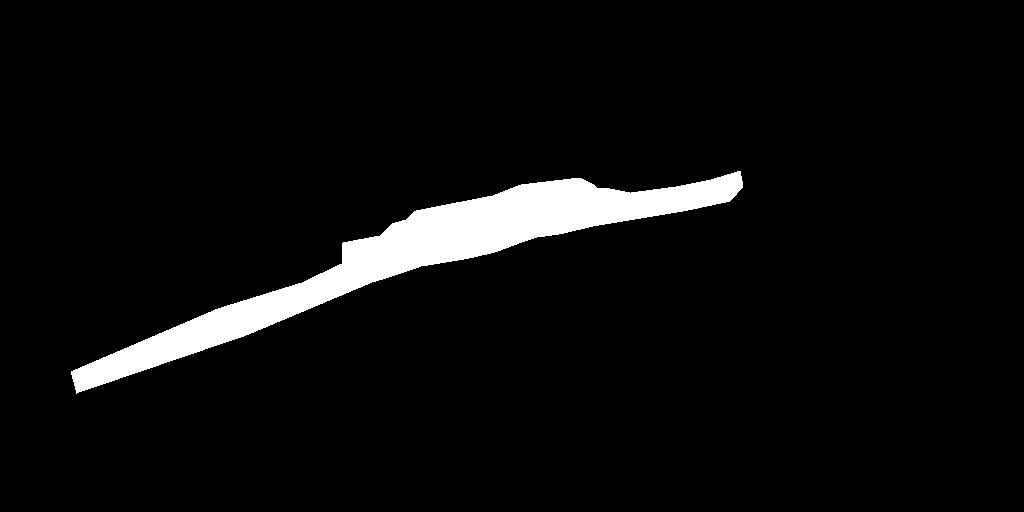

In [15]:
mask

In [16]:
infer_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

input_image = infer_transform(image)

output = seg_model(input_image.unsqueeze(dim=0))

In [17]:
output['out'].shape

torch.Size([1, 21, 512, 1024])

In [18]:
output['out'][0].shape

torch.Size([21, 512, 1024])

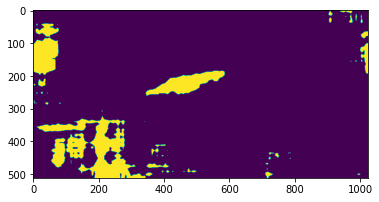

In [19]:
cls = torch.argmax(output['out'][0], dim=0).numpy()
out = np.zeros_like(cls)
out[cls==15] = 1
plt.imshow(out)

In [20]:
seg_model.classifier[4] = nn.Conv2d(512, 2, kernel_size=(1,1), stride=(1,1))
seg_model

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

### Dataset split, DataLoader

In [21]:
dent_train = SOCAR_Dataset(os.path.join(root,'Assignment_3_Dataset/scratch_small/train'), get_transform(train=True))
dent_valid = SOCAR_Dataset(os.path.join(root,'Assignment_3_Dataset/scratch_small/valid'), get_transform(train=False))
dent_test = SOCAR_Dataset(os.path.join(root,'Assignment_3_Dataset/scratch_small/test'), get_transform(train=False))


train_loader = DataLoader(dent_train, batch_size=2, shuffle=True, drop_last=True)
valid_loader = DataLoader(dent_valid, batch_size=2, shuffle=False, drop_last=True)
test_loader = DataLoader(dent_test, batch_size=2, shuffle=False, drop_last=True)

print(len(dent_train), len(dent_valid), len(dent_test))

200 267 267


### Trainer class 정의

In [22]:
## Trainer class 정의

class Semantic_Seg_Trainer(nn.Module):
    def __init__(self, model,opt="adam", num_class=2, lr=0.001, has_scheduler=False, device="cpu", log_dir="./logs", max_epoch=10):
        """
          Args:
            model: 사용할 model
            opt: optimizer
            lr: learning rate
            has_scheduler: learning rate scheduler 사용 여부
            device: 사용할 device (cpu/cuda)
        """
        super().__init__()
        
        self.max_epoch = max_epoch
        self.model = model                            
        self.loss = nn.CrossEntropyLoss()             # loss function 정의
        self.num_class = num_class

        self._get_optimizer(opt=opt.lower(), lr=lr)   # optimizer 정의
        self.has_scheduler = has_scheduler            # scheduler 사용여부 
        if self.has_scheduler:
            self._get_scheduler()

        self.device = device                          # 사용할 device
        
        self.log_dir = log_dir
        if not os.path.exists(log_dir): os.makedirs(log_dir)

    def _get_optimizer(self, opt, lr=0.001):
        """
          Args:
            opt: optimizer
            lr: learning rate
        """
        if opt == "sgd":
            self.optimizer = torch.optim.SGD(params=self.model.parameters(), lr=lr)
        elif opt == "adam":
            self.optimizer = torch.optim.Adam(params=self.model.parameters(), lr=lr)
        else:
            raise ValueError(f"optimizer {opt} is not supproted")

    def _get_scheduler(self):
        self.scheduler = torch.optim.lr_scheduler.StepLR(optimizer=self.optimizer, step_size=5, gamma=0.5, verbose=True)

    def train(self, train_loader, valid_loader, max_epochs=10, disp_epochs=1, visualize=False):
        """
          네트워크를 학습시키는 함수
          Args:
            train_loader: 학습에 사용할 train dataloader
            valid_loader: validation에 사용할 dataloader
            max_epochs: 학습을 진행할 총 epoch 수
            disp_epochs: 학습 log를 display 할 epoch 주기
            visualize: 학습 진행 과정에서 결과 이미지를 visualize 
        """
        print("===== Train Start =====")
        start_time = time.time()   
        history = {"train_loss": [], "valid_loss": [], "train_miou": [], "valid_miou": []}
        
        for e in range(max_epochs):
            print(f"Start Train Epoch {e}")
            train_loss, train_miou = self._train_epoch(train_loader)
            print(f"Start Valid Epoch {e}")
            valid_loss, valid_miou = self._valid_epoch(valid_loader)
            
            
            history["train_loss"].append(train_loss)      # 현재 epoch에서 성능을 history dict에 저장
            history["valid_loss"].append(valid_loss)      #
            
            history["train_miou"].append(train_miou)      # 
            history["valid_miou"].append(valid_miou)      #

            if self.has_scheduler:         # scheduler 사용할 경우 step size 조절
                self.scheduler.step()

            if e % disp_epochs == 0:        # disp_epoch 마다 결과값 출력 
                print(f"Epoch: {e}, train loss: {train_loss:>6f}, valid loss: {valid_loss:>6f}, train miou: {train_miou:>6f}, valid miou: {valid_miou:>6f}, time: {time.time()-start_time:>3f}")
                
                start_time = time.time()   

            self.plot_history(history, save_name=f"{self.log_dir}/log_epoch_{e}.png")       # 그래프 출력
            #################################################################################################
            #                                                                                               #
            # TODO : 한 epoch 의 학습이 끝날때 마다 model 을 save 하는 코드를 작성해봅시다.                 #
            #        graph 저장 코드를 참고하여 저장되는 model 의 이름에 몇 epoch 인지 나타나게 해봅시다.   # 
            #                                                                                               #
            #################################################################################################
            
            for param_tensor in seg_model.state_dict():
                print(f"{param_tensor}, \t {seg_model.state_dict()[param_tensor].size()}")
            # Save
            model_dir = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "model")
            if not os.path.exists(model_dir): os.makedirs(model_dir)    # model_dir 이 없을 경우 생성해줌
            torch.save(seg_model.state_dict(), os.path.join(model_dir, "scratch_sementation.pth"))


    def _train_epoch(self, train_loader, disp_step=10):
        """
          model를 training set 한 epoch 만큼 학습시키는 함수
          Args:
            train_loader: 학습에 사용할 train dataloader
          Returns:
            training set 한 epoch의 평균 loss, 평균 accuracy
        """
        epoch_loss = 0
        
        miou = 0
        ious = np.zeros([2])
        
        self.model.train()                 # self.model을 train 모드로 전환 --> nn.Module의 내장함수
        cnt = 0
        epoch_start_time = time.time()
        start_time = time.time()
        for (x, y) in train_loader:        # x: data, y:label
            cnt += 1

            x = x.to(self.device)
            label = y['masks'].to(self.device).type(torch.long)
            
            out = self.model(x)              # model이 예측한 output
            loss = self.loss(out['out'], label)       

            self.optimizer.zero_grad()       # backwardpass를 통한 network parameter 업데이트
            loss.backward()                  # 
            self.optimizer.step()            # 
            
            epoch_loss += loss.to("cpu").item()    
            
            out_background = torch.argmin(out['out'].to("cpu"), dim=1).to(self.device)           # meanIoU 계산을 위한 데이터 변형
            out_target = torch.argmax(out['out'].to("cpu"), dim=1).to(self.device)               #
            
            ious[0] += self.batch_segmentation_iou(out_background, torch.logical_not(label).type(torch.long)) # ious[0]:background IoU
            ious[1] += self.batch_segmentation_iou(out_target, label)                                         # ious[1]:파손 IoU
            
            if cnt % disp_step == 0:
                iou_back = ious[0]/(cnt*x.shape[0])
                iou_scratch = ious[1]/(cnt*x.shape[0])
                miou = (ious[0]/(cnt*x.shape[0]) + ious[1]/(cnt*x.shape[0])) / 2.
                
                print(f"Iter: {cnt}/{len(train_loader)}, train epcoh loss: {epoch_loss/(cnt):>6f}, miou: {miou:>6f}, iou_back : {iou_back:>6f}, iou_scratch : {iou_scratch:>6f}, time: {time.time()-start_time:>3f}")
                start_time = time.time()   

        epoch_loss /= len(train_loader)  
        
        
        iou_back = ious[0]/(cnt*x.shape[0])
        iou_scratch = ious[1]/(cnt*x.shape[0])
        epoch_miou = (ious[0]/(cnt*x.shape[0]) + ious[1]/(cnt*x.shape[0])) / 2.
        print(f"Train loss: {epoch_loss:>6f}, miou: {epoch_miou:>6f}, iou_back : {iou_back:>6f}, iou_scratch : {iou_scratch:>6f}, time: {time.time()-epoch_start_time:>3f}")

        return epoch_loss, epoch_miou
  
    def _valid_epoch(self, valid_loader, disp_step=10):
        """
          현재 model의 성능을 validation set에서 측정하는 함수
          Args:
            valid_loader: 학습에 사용할 valid dataloader
          Returns:
            validation set 의 평균 loss, 평균 accuracy
        """
        epoch_loss = 0
        
        miou = 0
        ious = np.zeros([2])
                      
        self.model.eval()                  # self.model을 eval 모드로 전환 --> nn.Module의 내장함수
        cnt = 0
        epoch_start_time = time.time()
        start_time = time.time()
        with torch.no_grad():              # model에 loss의 gradient를 계산하지 않음
            for (x, y) in valid_loader:
                cnt += 1
                x = x.to(self.device)
                label = y['masks'].to(self.device).type(torch.long)

                out = self.model(x) 
                loss = self.loss(out['out'], label)
                      
                epoch_loss += loss.to("cpu").item()
                
                out_background = torch.argmin(out['out'].to("cpu"), dim=1).to(self.device)
                out_target = torch.argmax(out['out'].to("cpu"), dim=1).to(self.device)

                ious[0] += self.batch_segmentation_iou(out_background, torch.logical_not(label).type(torch.long))
                ious[1] += self.batch_segmentation_iou(out_target, label)
                    

                
                
                if cnt % disp_step == 0:
                    iou_back = ious[0]/(cnt*x.shape[0])
                    iou_scratch = ious[1]/(cnt*x.shape[0])
                    miou = (ious[0]/(cnt*x.shape[0]) + ious[1]/(cnt*x.shape[0])) / 2.
                    print(f"Iter: {cnt}/{len(valid_loader)}, valid epcoh loss: {epoch_loss/(cnt):>6f}, miou: {miou:>6f}, iou_back : {iou_back:>6f}, iou_scratch : {iou_scratch:>6f}, time: {time.time()-start_time:>3f}")
                    start_time = time.time()   

        epoch_loss /= len(valid_loader)
        
        iou_back = ious[0]/(cnt*x.shape[0])
        iou_scratch = ious[1]/(cnt*x.shape[0])
        epoch_miou = (ious[0]/(cnt*x.shape[0]) + ious[1]/(cnt*x.shape[0])) / 2.
        print(f"Valid loss: {epoch_loss:>6f}, miou: {epoch_miou:>6f}, iou_back : {iou_back:>6f}, iou_scratch : {iou_scratch:>6f}, time: {time.time()-epoch_start_time:>3f}")

        return epoch_loss, epoch_miou

    def plot_history(self, history, save_name=None):
        """
          history에 저장된 model의 성능을 graph로 plot
          Args:
            history: dictionary with keys {"train_loss","valid_loss",  }
                     각 item 들은 epoch 단위의 성능 history의 list
        """
        fig = plt.figure(figsize=(16, 8))
        
        
        ax = fig.add_subplot(1, 2, 1)
        ax.plot(history["train_loss"], color="red", label="train loss")
        ax.plot(history["valid_loss"], color="blue", label="valid loss")
        ax.title.set_text("Loss")
        ax.legend()
        
        ax = fig.add_subplot(1, 2, 2)
        ax.plot(history["train_miou"], color="red", label="train miou")
        ax.plot(history["valid_miou"], color="blue", label="valid miou")
        ax.title.set_text("miou")
        ax.legend()

        plt.show()
                      
        if not save_name == None:     # graph 저장
            plt.savefig(save_name)
                      
        

    def test(self, test_loader):
        """
          현재 model의 성능을 test set에서 측정하는 함수
          Args:
            test_loader: 학습에 사용할 test dataloader
          Returns:
            test set 의 평균 loss, 평균 accuracy
        """
        print("===== Test Start =====")
        start_time = time.time()
        epoch_loss = 0
        
        miou = 0
        ious = np.zeros([2])
                      
        self.model.eval()                  # self.model을 eval 모드로 전환 --> nn.Module의 내장함수
        cnt = 0
        epoch_start_time = time.time()
        start_time = time.time()
        with torch.no_grad():              # model에 loss의 gradient를 계산하지 않음
            for (x, y) in test_loader:
                cnt += 1
                x = x.to(self.device)
                label = y['masks'].to(self.device).type(torch.long)

                out = self.model(x) 
                loss = self.loss(out['out'], label)

                epoch_loss += loss.to("cpu").item()
                      
                out_background = torch.argmin(out['out'].to("cpu"), dim=1).to(self.device)
                out_target = torch.argmax(out['out'].to("cpu"), dim=1).to(self.device)

                ious[0] += self.batch_segmentation_iou(out_background, torch.logical_not(label).type(torch.long))
                ious[1] += self.batch_segmentation_iou(out_target, label)
                
                if cnt % 10 == 0:
                    iou_back = ious[0]/(cnt*x.shape[0])
                    iou_scratch = ious[1]/(cnt*x.shape[0])
                    miou = (ious[0]/(cnt*x.shape[0]) + ious[1]/(cnt*x.shape[0])) / 2.
                    print(f"Iter: {cnt}/{len(valid_loader)}, test epcoh loss: {epoch_loss/(cnt):>6f}, miou: {miou:>6f}, iou_back : {iou_back:>6f}, iou_scratch : {iou_scratch:>6f}, time: {time.time()-start_time:>3f}")
                    start_time = time.time()  

        epoch_loss /= len(test_loader)
        
        
        iou_back = ious[0]/(cnt*x.shape[0])
        iou_scratch = ious[1]/(cnt*x.shape[0])
        epoch_miou = (ious[0]/(cnt*x.shape[0]) + ious[1]/(cnt*x.shape[0])) / 2.
        
        print(f"Test loss: {epoch_loss:>6f}, miou: {epoch_miou:>6f}, iou_back : {iou_back:>6f}, iou_scratch : {iou_scratch:>6f}, time: {time.time()-epoch_start_time:>3f}")

    
    def batch_segmentation_iou(self, outputs, labels):
        """
            outputs, labels : (batch, h, w)
        """
        
        SMOOTH = 1e-6

        intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
        union = (outputs | labels).float().sum((1, 2))         # Will be zero if both are 0

        iou = (intersection + SMOOTH) / (union + SMOOTH)
        # TODO
        
        #################################################################################################
        #                                                                                               #
        # TODO : 위 코드를 보고 IoU 를 계산하는 코드를 만들어봅시다.                                    #
        # hint : 나누기에서 0으로 나누면 error 가 발생하기 때문에 이를 피하기 위해 분자와 분모에        #
        #        아주 작은 수인 SMOOTH 를 더해줍시다                                                    #
        #        ex) x / y   --->   (x + SMOOTH) / (y + SMOOTH)                                         #
        #                                                                                               #
        #################################################################################################
        
        
        return torch.sum(iou).to("cpu").numpy()

### Fine-tuning
device 를 gpu 로 설정하고 trainer를 정의해봅시다.
정의된 trainer 와 train, valid 데이터로 모델을 학습을 시켜봅시다

In [ ]:
#################################################################################################
#                                                                                               #
# TODO : trainer 를 정의해봅시다.                                                               #
#                                                                                               #
#################################################################################################

In [23]:
device = "cuda"
trainer1 = Semantic_Seg_Trainer(model=seg_model, opt="adam", lr=0.001, has_scheduler=False, device=device).to(device)

===== Train Start =====
Start Train Epoch 0
Iter: 10/100, train epcoh loss: 0.430746, miou: 0.438603, iou_back : 0.819637, iou_scratch : 0.057570, time: 10.665941
Iter: 20/100, train epcoh loss: 0.316388, miou: 0.456356, iou_back : 0.883928, iou_scratch : 0.028785, time: 9.297844
Iter: 30/100, train epcoh loss: 0.265571, miou: 0.480686, iou_back : 0.908849, iou_scratch : 0.052523, time: 9.036309
Iter: 40/100, train epcoh loss: 0.235036, miou: 0.481356, iou_back : 0.923320, iou_scratch : 0.039392, time: 9.351050
Iter: 50/100, train epcoh loss: 0.214169, miou: 0.491872, iou_back : 0.932231, iou_scratch : 0.051514, time: 9.497893
Iter: 60/100, train epcoh loss: 0.201106, miou: 0.498816, iou_back : 0.938038, iou_scratch : 0.059595, time: 9.863909
Iter: 70/100, train epcoh loss: 0.194723, miou: 0.499276, iou_back : 0.940327, iou_scratch : 0.058224, time: 9.267152
Iter: 80/100, train epcoh loss: 0.187855, miou: 0.496872, iou_back : 0.942799, iou_scratch : 0.050946, time: 9.387858
Iter: 90/10

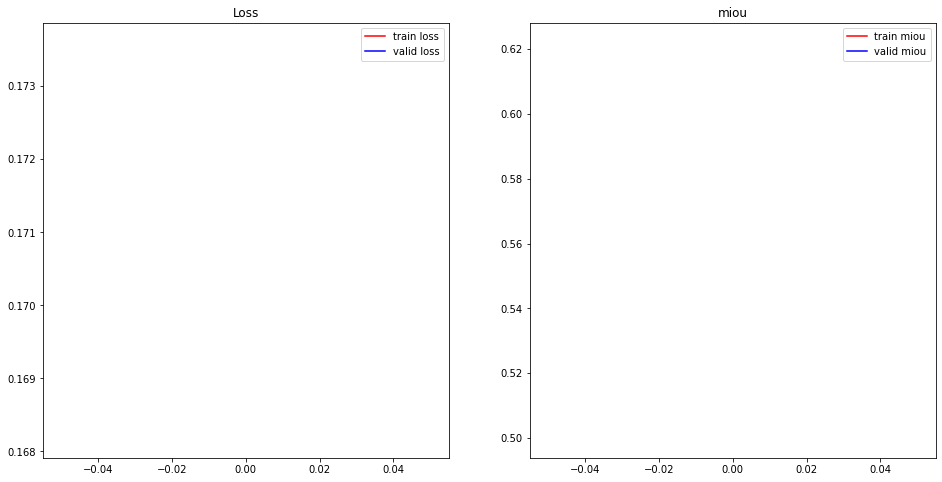

backbone.conv1.weight, 	 torch.Size([64, 3, 7, 7])
backbone.bn1.weight, 	 torch.Size([64])
backbone.bn1.bias, 	 torch.Size([64])
backbone.bn1.running_mean, 	 torch.Size([64])
backbone.bn1.running_var, 	 torch.Size([64])
backbone.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv1.weight, 	 torch.Size([64, 64, 1, 1])
backbone.layer1.0.bn1.weight, 	 torch.Size([64])
backbone.layer1.0.bn1.bias, 	 torch.Size([64])
backbone.layer1.0.bn1.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn1.running_var, 	 torch.Size([64])
backbone.layer1.0.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv2.weight, 	 torch.Size([64, 64, 3, 3])
backbone.layer1.0.bn2.weight, 	 torch.Size([64])
backbone.layer1.0.bn2.bias, 	 torch.Size([64])
backbone.layer1.0.bn2.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn2.running_var, 	 torch.Size([64])
backbone.layer1.0.bn2.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv3.weight, 	 torch.Size([256, 64, 1, 1])
backbone.layer1

<Figure size 432x288 with 0 Axes>

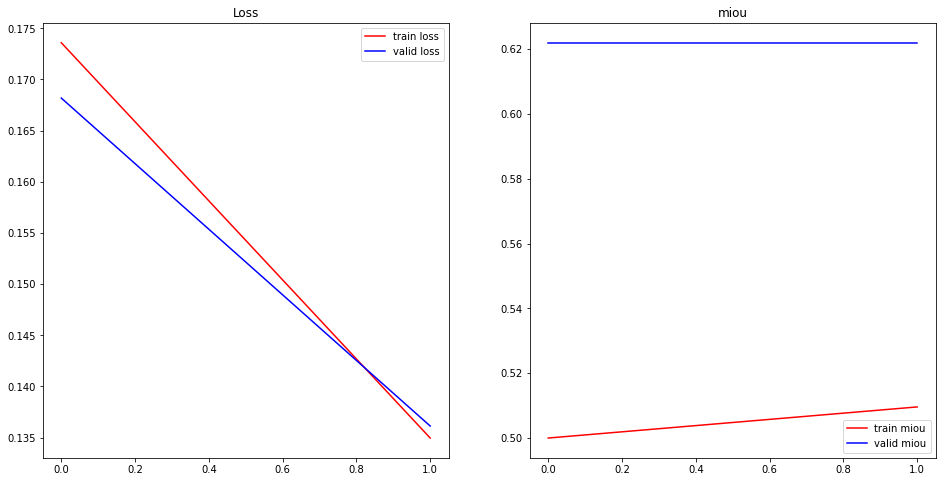

backbone.conv1.weight, 	 torch.Size([64, 3, 7, 7])
backbone.bn1.weight, 	 torch.Size([64])
backbone.bn1.bias, 	 torch.Size([64])
backbone.bn1.running_mean, 	 torch.Size([64])
backbone.bn1.running_var, 	 torch.Size([64])
backbone.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv1.weight, 	 torch.Size([64, 64, 1, 1])
backbone.layer1.0.bn1.weight, 	 torch.Size([64])
backbone.layer1.0.bn1.bias, 	 torch.Size([64])
backbone.layer1.0.bn1.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn1.running_var, 	 torch.Size([64])
backbone.layer1.0.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv2.weight, 	 torch.Size([64, 64, 3, 3])
backbone.layer1.0.bn2.weight, 	 torch.Size([64])
backbone.layer1.0.bn2.bias, 	 torch.Size([64])
backbone.layer1.0.bn2.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn2.running_var, 	 torch.Size([64])
backbone.layer1.0.bn2.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv3.weight, 	 torch.Size([256, 64, 1, 1])
backbone.layer1

<Figure size 432x288 with 0 Axes>

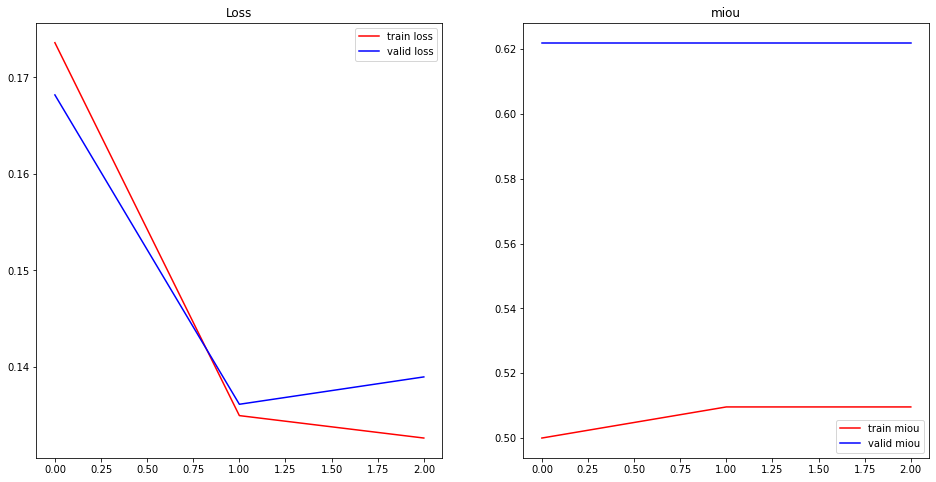

backbone.conv1.weight, 	 torch.Size([64, 3, 7, 7])
backbone.bn1.weight, 	 torch.Size([64])
backbone.bn1.bias, 	 torch.Size([64])
backbone.bn1.running_mean, 	 torch.Size([64])
backbone.bn1.running_var, 	 torch.Size([64])
backbone.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv1.weight, 	 torch.Size([64, 64, 1, 1])
backbone.layer1.0.bn1.weight, 	 torch.Size([64])
backbone.layer1.0.bn1.bias, 	 torch.Size([64])
backbone.layer1.0.bn1.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn1.running_var, 	 torch.Size([64])
backbone.layer1.0.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv2.weight, 	 torch.Size([64, 64, 3, 3])
backbone.layer1.0.bn2.weight, 	 torch.Size([64])
backbone.layer1.0.bn2.bias, 	 torch.Size([64])
backbone.layer1.0.bn2.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn2.running_var, 	 torch.Size([64])
backbone.layer1.0.bn2.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv3.weight, 	 torch.Size([256, 64, 1, 1])
backbone.layer1

<Figure size 432x288 with 0 Axes>

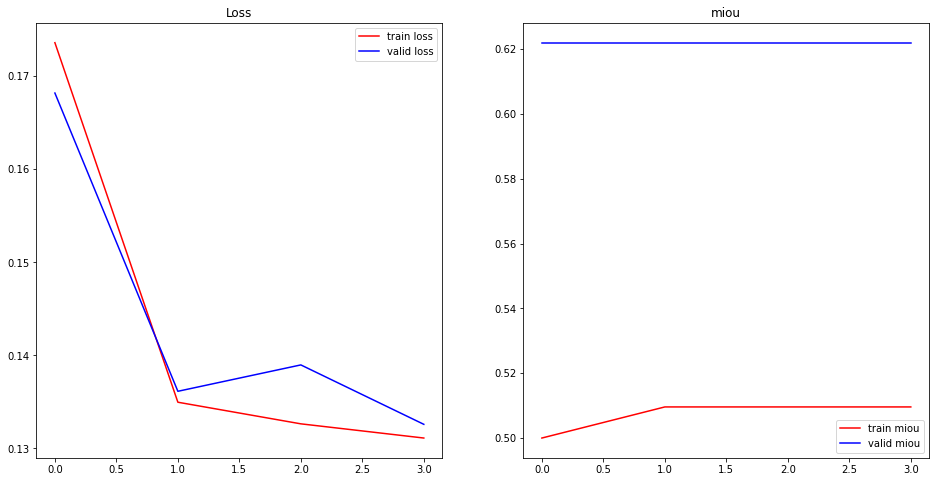

backbone.conv1.weight, 	 torch.Size([64, 3, 7, 7])
backbone.bn1.weight, 	 torch.Size([64])
backbone.bn1.bias, 	 torch.Size([64])
backbone.bn1.running_mean, 	 torch.Size([64])
backbone.bn1.running_var, 	 torch.Size([64])
backbone.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv1.weight, 	 torch.Size([64, 64, 1, 1])
backbone.layer1.0.bn1.weight, 	 torch.Size([64])
backbone.layer1.0.bn1.bias, 	 torch.Size([64])
backbone.layer1.0.bn1.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn1.running_var, 	 torch.Size([64])
backbone.layer1.0.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv2.weight, 	 torch.Size([64, 64, 3, 3])
backbone.layer1.0.bn2.weight, 	 torch.Size([64])
backbone.layer1.0.bn2.bias, 	 torch.Size([64])
backbone.layer1.0.bn2.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn2.running_var, 	 torch.Size([64])
backbone.layer1.0.bn2.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv3.weight, 	 torch.Size([256, 64, 1, 1])
backbone.layer1

<Figure size 432x288 with 0 Axes>

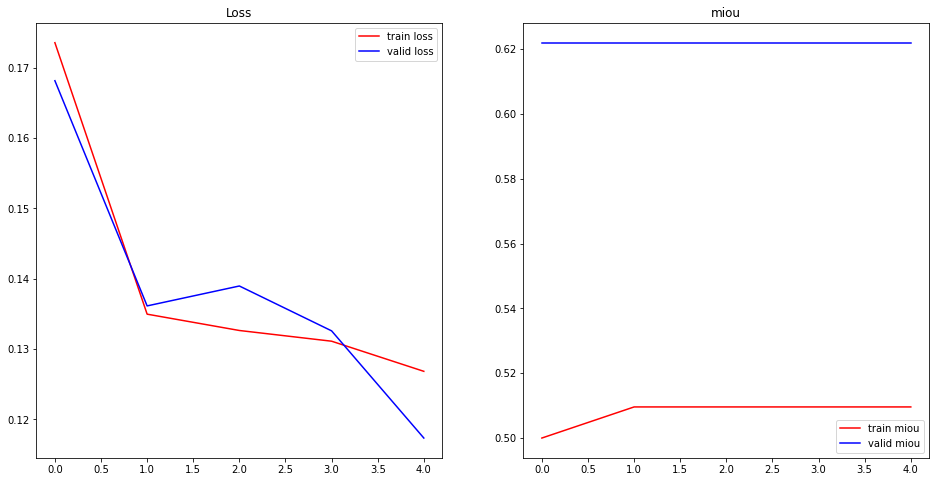

backbone.conv1.weight, 	 torch.Size([64, 3, 7, 7])
backbone.bn1.weight, 	 torch.Size([64])
backbone.bn1.bias, 	 torch.Size([64])
backbone.bn1.running_mean, 	 torch.Size([64])
backbone.bn1.running_var, 	 torch.Size([64])
backbone.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv1.weight, 	 torch.Size([64, 64, 1, 1])
backbone.layer1.0.bn1.weight, 	 torch.Size([64])
backbone.layer1.0.bn1.bias, 	 torch.Size([64])
backbone.layer1.0.bn1.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn1.running_var, 	 torch.Size([64])
backbone.layer1.0.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv2.weight, 	 torch.Size([64, 64, 3, 3])
backbone.layer1.0.bn2.weight, 	 torch.Size([64])
backbone.layer1.0.bn2.bias, 	 torch.Size([64])
backbone.layer1.0.bn2.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn2.running_var, 	 torch.Size([64])
backbone.layer1.0.bn2.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv3.weight, 	 torch.Size([256, 64, 1, 1])
backbone.layer1

<Figure size 432x288 with 0 Axes>

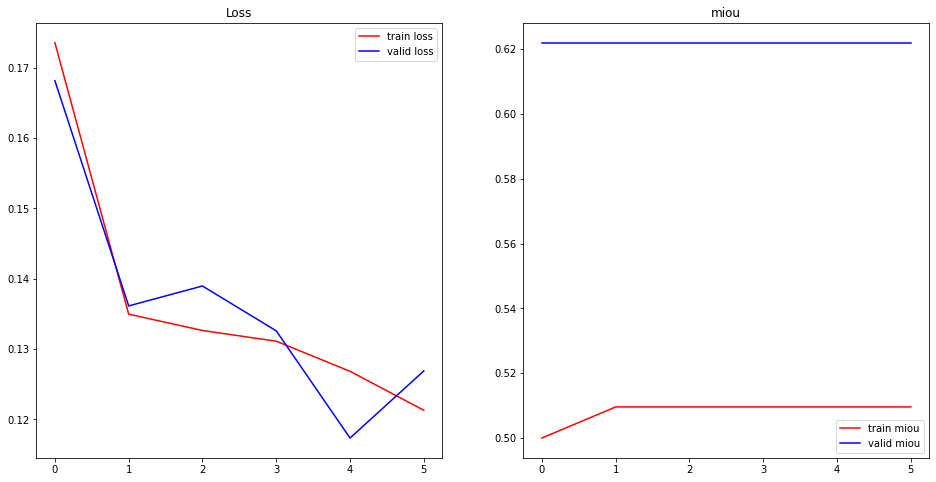

backbone.conv1.weight, 	 torch.Size([64, 3, 7, 7])
backbone.bn1.weight, 	 torch.Size([64])
backbone.bn1.bias, 	 torch.Size([64])
backbone.bn1.running_mean, 	 torch.Size([64])
backbone.bn1.running_var, 	 torch.Size([64])
backbone.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv1.weight, 	 torch.Size([64, 64, 1, 1])
backbone.layer1.0.bn1.weight, 	 torch.Size([64])
backbone.layer1.0.bn1.bias, 	 torch.Size([64])
backbone.layer1.0.bn1.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn1.running_var, 	 torch.Size([64])
backbone.layer1.0.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv2.weight, 	 torch.Size([64, 64, 3, 3])
backbone.layer1.0.bn2.weight, 	 torch.Size([64])
backbone.layer1.0.bn2.bias, 	 torch.Size([64])
backbone.layer1.0.bn2.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn2.running_var, 	 torch.Size([64])
backbone.layer1.0.bn2.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv3.weight, 	 torch.Size([256, 64, 1, 1])
backbone.layer1

<Figure size 432x288 with 0 Axes>

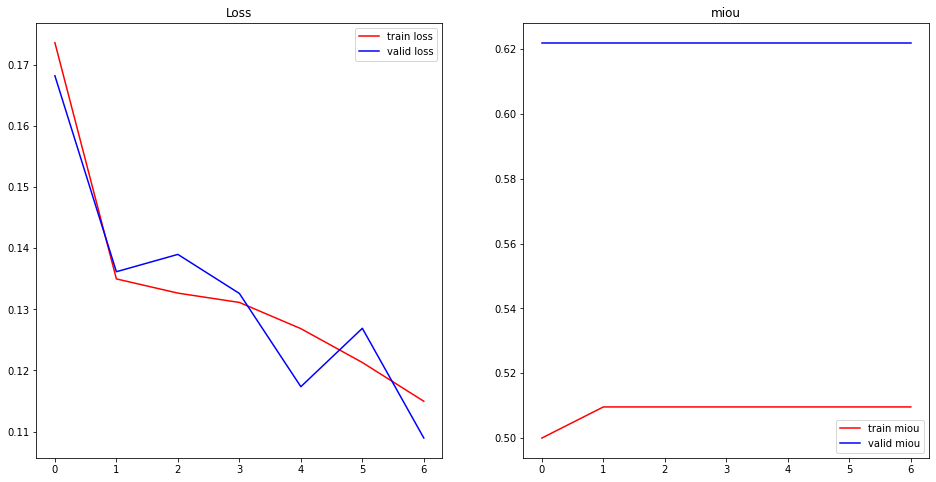

backbone.conv1.weight, 	 torch.Size([64, 3, 7, 7])
backbone.bn1.weight, 	 torch.Size([64])
backbone.bn1.bias, 	 torch.Size([64])
backbone.bn1.running_mean, 	 torch.Size([64])
backbone.bn1.running_var, 	 torch.Size([64])
backbone.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv1.weight, 	 torch.Size([64, 64, 1, 1])
backbone.layer1.0.bn1.weight, 	 torch.Size([64])
backbone.layer1.0.bn1.bias, 	 torch.Size([64])
backbone.layer1.0.bn1.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn1.running_var, 	 torch.Size([64])
backbone.layer1.0.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv2.weight, 	 torch.Size([64, 64, 3, 3])
backbone.layer1.0.bn2.weight, 	 torch.Size([64])
backbone.layer1.0.bn2.bias, 	 torch.Size([64])
backbone.layer1.0.bn2.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn2.running_var, 	 torch.Size([64])
backbone.layer1.0.bn2.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv3.weight, 	 torch.Size([256, 64, 1, 1])
backbone.layer1

<Figure size 432x288 with 0 Axes>

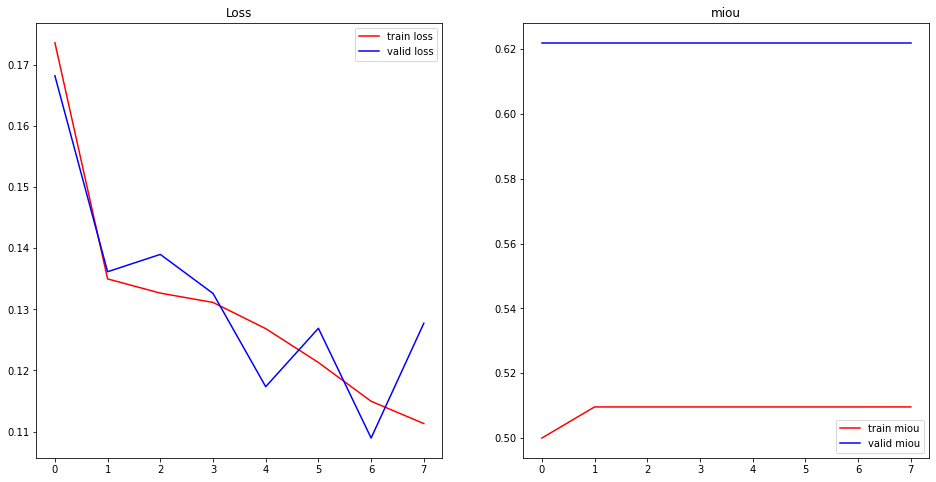

backbone.conv1.weight, 	 torch.Size([64, 3, 7, 7])
backbone.bn1.weight, 	 torch.Size([64])
backbone.bn1.bias, 	 torch.Size([64])
backbone.bn1.running_mean, 	 torch.Size([64])
backbone.bn1.running_var, 	 torch.Size([64])
backbone.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv1.weight, 	 torch.Size([64, 64, 1, 1])
backbone.layer1.0.bn1.weight, 	 torch.Size([64])
backbone.layer1.0.bn1.bias, 	 torch.Size([64])
backbone.layer1.0.bn1.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn1.running_var, 	 torch.Size([64])
backbone.layer1.0.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv2.weight, 	 torch.Size([64, 64, 3, 3])
backbone.layer1.0.bn2.weight, 	 torch.Size([64])
backbone.layer1.0.bn2.bias, 	 torch.Size([64])
backbone.layer1.0.bn2.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn2.running_var, 	 torch.Size([64])
backbone.layer1.0.bn2.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv3.weight, 	 torch.Size([256, 64, 1, 1])
backbone.layer1

<Figure size 432x288 with 0 Axes>

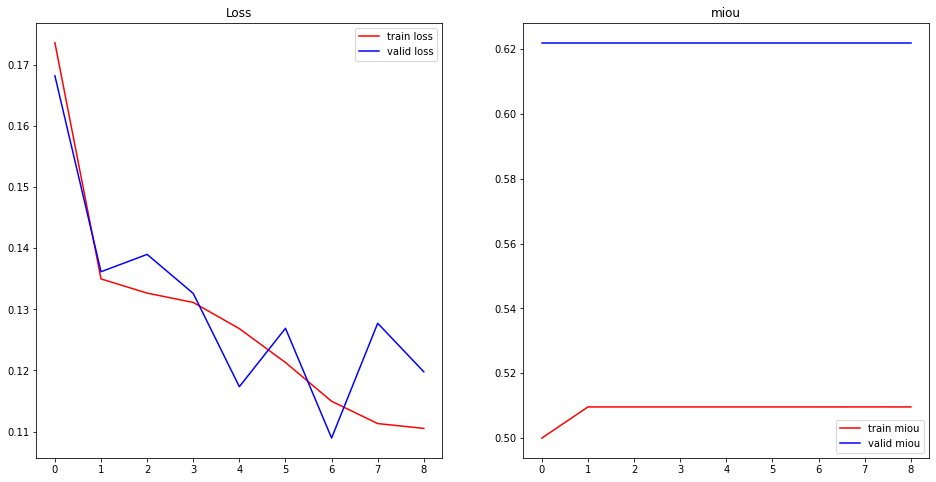

backbone.conv1.weight, 	 torch.Size([64, 3, 7, 7])
backbone.bn1.weight, 	 torch.Size([64])
backbone.bn1.bias, 	 torch.Size([64])
backbone.bn1.running_mean, 	 torch.Size([64])
backbone.bn1.running_var, 	 torch.Size([64])
backbone.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv1.weight, 	 torch.Size([64, 64, 1, 1])
backbone.layer1.0.bn1.weight, 	 torch.Size([64])
backbone.layer1.0.bn1.bias, 	 torch.Size([64])
backbone.layer1.0.bn1.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn1.running_var, 	 torch.Size([64])
backbone.layer1.0.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv2.weight, 	 torch.Size([64, 64, 3, 3])
backbone.layer1.0.bn2.weight, 	 torch.Size([64])
backbone.layer1.0.bn2.bias, 	 torch.Size([64])
backbone.layer1.0.bn2.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn2.running_var, 	 torch.Size([64])
backbone.layer1.0.bn2.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv3.weight, 	 torch.Size([256, 64, 1, 1])
backbone.layer1

<Figure size 432x288 with 0 Axes>

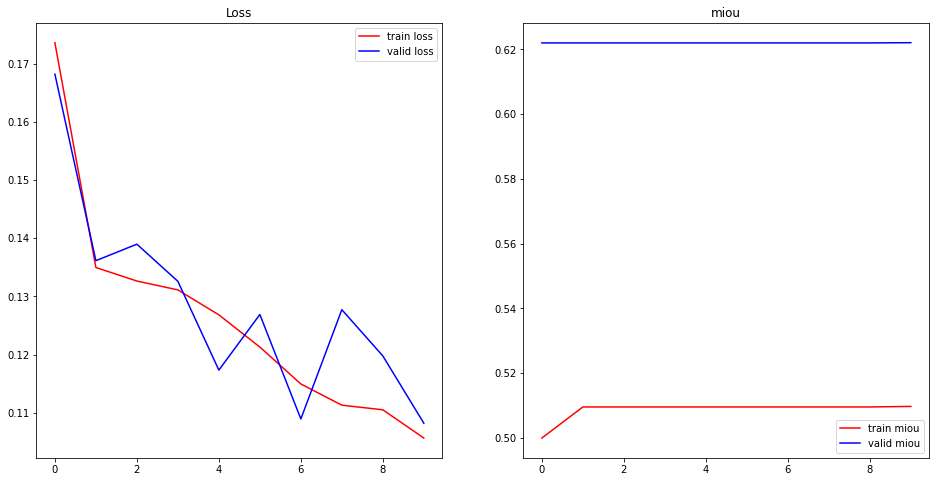

backbone.conv1.weight, 	 torch.Size([64, 3, 7, 7])
backbone.bn1.weight, 	 torch.Size([64])
backbone.bn1.bias, 	 torch.Size([64])
backbone.bn1.running_mean, 	 torch.Size([64])
backbone.bn1.running_var, 	 torch.Size([64])
backbone.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv1.weight, 	 torch.Size([64, 64, 1, 1])
backbone.layer1.0.bn1.weight, 	 torch.Size([64])
backbone.layer1.0.bn1.bias, 	 torch.Size([64])
backbone.layer1.0.bn1.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn1.running_var, 	 torch.Size([64])
backbone.layer1.0.bn1.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv2.weight, 	 torch.Size([64, 64, 3, 3])
backbone.layer1.0.bn2.weight, 	 torch.Size([64])
backbone.layer1.0.bn2.bias, 	 torch.Size([64])
backbone.layer1.0.bn2.running_mean, 	 torch.Size([64])
backbone.layer1.0.bn2.running_var, 	 torch.Size([64])
backbone.layer1.0.bn2.num_batches_tracked, 	 torch.Size([])
backbone.layer1.0.conv3.weight, 	 torch.Size([256, 64, 1, 1])
backbone.layer1

<Figure size 432x288 with 0 Axes>

In [24]:
trainer1.train(train_loader, valid_loader)

In [ ]:
start_time = time.time()
trainer.train(train_loader, valid_loader)
print(f"Training time : {time.time()-start_time:>3f}")

NameError: ignored

### Fine-tuning 결과 테스트
학습된 모델 parameter 를 load 하여 test 성능을 확인해보고 test set 에서 좋은 예시를 찾아서 visualize 해봅시다.

In [25]:
model_dir = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "model")
model_path = os.path.join(model_dir, "scratch_sementation.pth")
print(model_path)
seg_model.load_state_dict(torch.load(model_path))
seg_model.eval()

/content/drive/MyDrive/Colab Notebooks/model/scratch_sementation.pth


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [26]:
#################################################################################################
#                                                                                               #
# TODO : save 한 model parameter 를 load 하여 test set 에서 성능을 확인해봅시다.                #
#                                                                                               #
#################################################################################################
device = "cuda"
trainer_load = Semantic_Seg_Trainer(model=seg_model, opt="adam", lr=0.001, has_scheduler=False, device=device).to(device)
trainer_load.test(test_loader)

===== Test Start =====
Iter: 10/133, test epcoh loss: 0.014772, miou: 1.000000, iou_back : 1.000000, iou_scratch : 1.000000, time: 9.694558
Iter: 20/133, test epcoh loss: 0.017815, miou: 1.000000, iou_back : 1.000000, iou_scratch : 1.000000, time: 9.640549
Iter: 30/133, test epcoh loss: 0.020167, miou: 1.000000, iou_back : 1.000000, iou_scratch : 1.000000, time: 9.329804
Iter: 40/133, test epcoh loss: 0.048537, miou: 0.906956, iou_back : 0.988913, iou_scratch : 0.825000, time: 10.171126
Iter: 50/133, test epcoh loss: 0.050708, miou: 0.838407, iou_back : 0.986814, iou_scratch : 0.690000, time: 9.707812
Iter: 60/133, test epcoh loss: 0.070663, miou: 0.777490, iou_back : 0.979973, iou_scratch : 0.575007, time: 10.292182
Iter: 70/133, test epcoh loss: 0.080162, miou: 0.734667, iou_back : 0.976471, iou_scratch : 0.492863, time: 10.549939
Iter: 80/133, test epcoh loss: 0.085808, miou: 0.702833, iou_back : 0.974411, iou_scratch : 0.431255, time: 11.370800
Iter: 90/133, test epcoh loss: 0.0898

In [27]:
print(root)

/content/drive/MyDrive/Colab Notebooks/쏘카


In [28]:
image = Image.open(os.path.join(root,'Assignment_3_Dataset/scratch_small/test/images/20180111_4704_10788370_f963eddc50a4a3a524a507f231753529_augmented11.jpg'))


infer_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

input_image = infer_transform(image).to(device)

output = seg_model(input_image.unsqueeze(dim=0))
output['out'][0].shape

torch.Size([2, 512, 512])

In [29]:
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7FF840DC5F90>


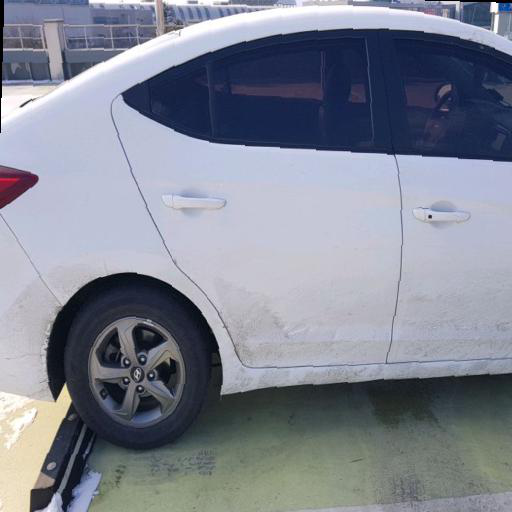

In [30]:
image

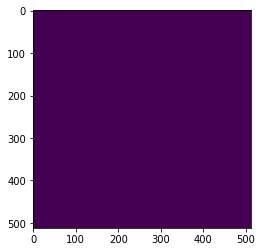

In [31]:
cls = torch.argmax(output['out'][0].to("cpu"), dim=0).numpy()
out = np.zeros_like(cls)
out[cls==1] = 1
plt.imshow(out)

In [ ]:
cls = torch.argmax(output['out'][0], dim=0).numpy()
out = np.zeros_like(cls)
out[cls==15] = 1
plt.imshow(out)

TypeError: ignored

In [ ]:
#################################################################################################
#                                                                                               #
# TODO : [ 이미지, ground truth, prediction ] 을 가로로 나란히 subplot 해봅시다.                #
#                                                                                               #
#################################################################################################

In [ ]:
from PIL import ImageDraw

def draw_bounding_boxes(image, boxes, pred=False, confs=None, confidence_th=None):

    if pred:
      valid = np.where(confs>confidence_th)
      boxes = boxes[valid]

    img_to_draw = Image.fromarray(image)
    draw = ImageDraw.Draw(img_to_draw)

    for i, bbox in enumerate(boxes):
        draw.rectangle(bbox)
        
    return img_to_draw